In [4]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('../times.ttf')
fm.fontManager.addfont('../times_Italic.ttf')

jobs = {
    1: [
        "skyworkrm_dpo_online_0920T16:13",
        "skyworkrm_dpo_online_0920T15:15",
        "skyworkrm_dpo_online_0917T08:29",
    ], # online dpo
    2: [
        "skyworkrm_dpo_duelingts_0925T23:05",
        "skyworkrm_dpo_duelingts_0925T20:17",
        "skyworkrm_dpo_duelingts_0925T12:39"
    ], # sea-dpo without MAP
    3: [
        "skyworkrm_dpo_dueling_dyna_0926T14:07",
        "skyworkrm_dpo_dueling_dyna_0926T09:47",
        "skyworkrm_dpo_dueling_dyna_0926T05:24",
    ], # sea-dpo
    4: [
        "skyworkrm_no4_passive_bon_0929T08:17",
        "skyworkrm_no4_passive_bon_0929T09:41",
        "skyworkrm_no4_passive_bon_0929T11:05"
    ], # BoN, passive
    5: [
        "skyworkrm_no5_duelts_bon_0929T22:56",
        "skyworkrm_no5_duelts_bon_0929T19:44",
        "skyworkrm_no5_duelts_bon_0929T16:30"
    ], # BoN active but no dyna
    6: [
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T12:00",
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T07:29",
        "skyworkrm_dpo_dueling_dyna_bon_real_0930T03:01"
    ], # BoN active but with dyna
    7: [
        "skyworkrm_no7_dm_0929T14:03",
        "skyworkrm_no7_dm_0929T11:03",
        "skyworkrm_no7_dm_0929T08:12"
    ], # DM baseline
}

def get_no(name):
    for k,v in jobs.items():
        if name in v:
            return k
        
api = wandb.Api()
save_dir = "./analysis_data"
runs = api.runs("lkevinzc/ellm_simpo")
data_list = []
cfg_list = []

features_of_interest = ["eval/rm_win_rate_prob", "misc/query_step"]
flatten_fns = tree.flatten(jobs)
os.makedirs(save_dir, exist_ok=True)
for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        print(run.name)
        name = run.name
        if not os.path.exists(f"{save_dir}/{name}.csv"):
            data = run.history(keys=features_of_interest)
            data["seed"] = cfg["seed"]
            data["run_name"] = cfg["wandb_run_name"]
            
            method = get_no(name)
            
            data["method"] = method
            data.to_csv(f"{save_dir}/{name}.csv")

  0%|          | 0/769 [00:00<?, ?it/s]

skyworkrm_dpo_dueling_dyna_bon_real_0930T12:00
skyworkrm_dpo_dueling_dyna_bon_real_0930T07:29
skyworkrm_dpo_dueling_dyna_bon_real_0930T03:01
skyworkrm_no5_duelts_bon_0929T22:56
skyworkrm_no5_duelts_bon_0929T19:44
skyworkrm_no5_duelts_bon_0929T16:30
skyworkrm_no7_dm_0929T14:03
skyworkrm_no4_passive_bon_0929T11:05
skyworkrm_no7_dm_0929T11:03
skyworkrm_no4_passive_bon_0929T09:41
skyworkrm_no4_passive_bon_0929T08:17
skyworkrm_no7_dm_0929T08:12


 20%|█▉        | 151/769 [00:02<00:09, 63.59it/s]

skyworkrm_dpo_dueling_dyna_0926T14:07
skyworkrm_dpo_dueling_dyna_0926T09:47
skyworkrm_dpo_dueling_dyna_0926T05:24
skyworkrm_dpo_duelingts_0925T23:05


 26%|██▌       | 201/769 [00:03<00:10, 56.51it/s]

skyworkrm_dpo_duelingts_0925T20:17
skyworkrm_dpo_duelingts_0925T12:39


 46%|████▌     | 351/769 [00:05<00:05, 79.24it/s]

skyworkrm_dpo_online_0920T16:13
skyworkrm_dpo_online_0920T15:15


 52%|█████▏    | 401/769 [00:05<00:05, 72.96it/s]

skyworkrm_dpo_online_0917T08:29


100%|██████████| 769/769 [00:10<00:00, 72.11it/s]


In [5]:
fns = glob.glob(f"{save_dir}/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)
df

,_step,eval/rm_win_rate_prob,misc/query_step,seed,run_name,method
0,0,0.439557,0,4198483828,skyworkrm_no5_duelts_bon,5
1,20,0.600201,2560,4198483828,skyworkrm_no5_duelts_bon,5
2,40,0.687400,5120,4198483828,skyworkrm_no5_duelts_bon,5
3,60,0.727839,7680,4198483828,skyworkrm_no5_duelts_bon,5
4,80,0.756654,10240,4198483828,skyworkrm_no5_duelts_bon,5
...,...,...,...,...,...,...
16,320,0.911187,40960,1580010211,skyworkrm_no5_duelts_bon,5
17,340,0.889327,43520,1580010211,skyworkrm_no5_duelts_bon,5
18,360,0.907643,46080,1580010211,skyworkrm_no5_duelts_bon,5
19,380,0.906417,48640,1580010211,skyworkrm_no5_duelts_bon,5


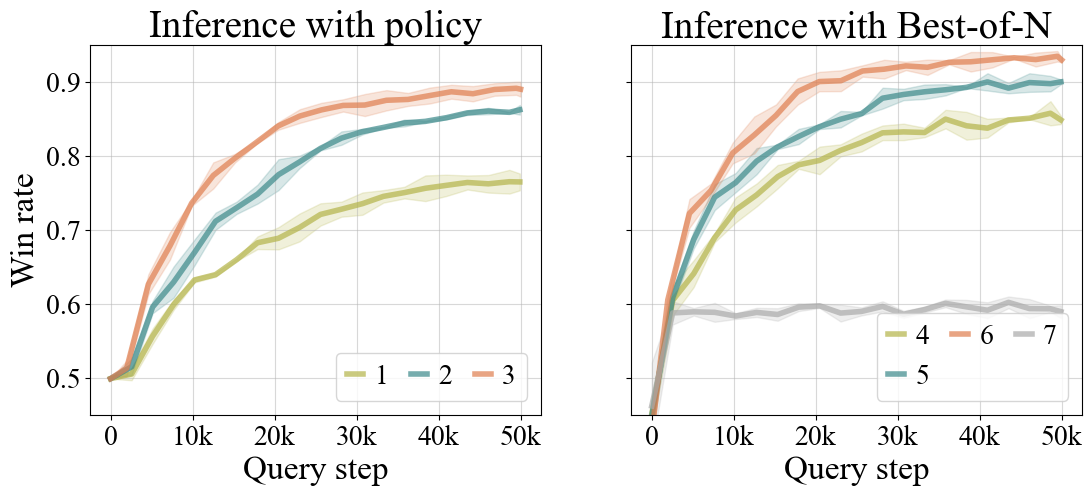

In [6]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
    1: (180/255, 180/255, 73/255),
    2: (60/255, 137/255, 138/255),
    3: (223/255, 126/255, 79/255),
    4: (180/255, 180/255, 73/255),
    5: (60/255, 137/255, 138/255),
    6: (223/255, 126/255, 79/255),
    7: "#aaaaaa",
}
# methods_to_labels= {
#     "offline": "Offline",
#     "online": "Online",
#     "sea": "SEA",
#     "xpo": "XPO",
#     "apl": "APL"
# }

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(fig.get_figwidth() * 2)

for i, ax in enumerate(axes):
    data_of_interest = [1,2,3] if i == 0 else [4,5,6,7]
    ax=sns.lineplot(data=df[df.method.isin(data_of_interest)], x="misc/query_step", y="eval/rm_win_rate_prob", hue="method", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )
    if i == 0:
        ax.set_title("Inference with policy", fontsize=28)
    else:
        ax.set_title("Inference with Best-of-N", fontsize=28)

    sns.move_legend(
        ax, "lower right",
        # bbox_to_anchor=(0.45, -0.07), 
        ncol=3, 
        title=None, 
        frameon=True,
        # labels=[methods_to_labels[k] for k in hue_order],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
    ax.set_ylabel('Win rate', fontsize=24)
    ax.set_xlabel('Query step', fontsize=24)
    ax.set_xticks([0, 10_000, 20_000, 30_000, 40_000, 50_000],
        ["0", "10k", "20k", "30k", "40k", "50k"])
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.set_ylim(0.45, 0.95)
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("analysis_curve.pdf", bbox_inches="tight")

In [7]:
final_wr = df.groupby(["method", "seed"]).last()["eval/rm_win_rate_prob"].reset_index()
final_wr["inference"] = "policy"

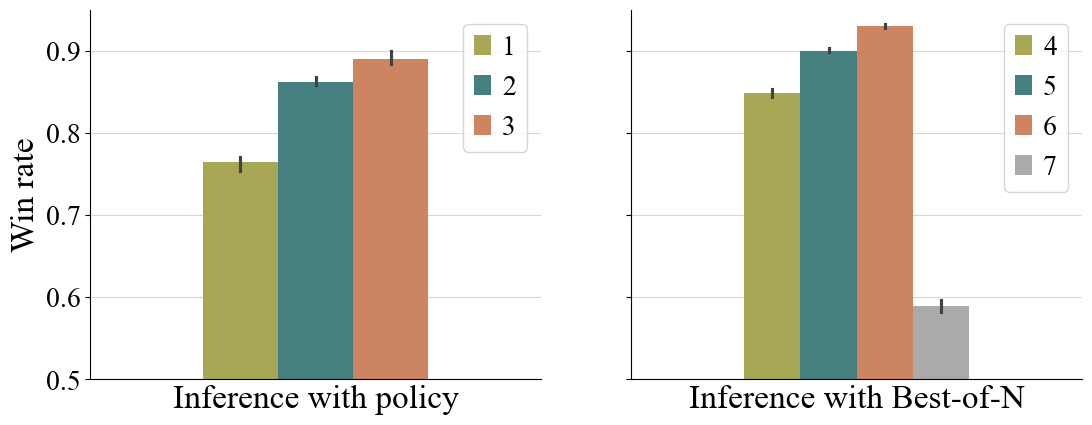

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(fig.get_figwidth() * 2)

for i, ax in enumerate(axes):
    data_of_interest = [1,2,3] if i == 0 else [4,5,6,7]
    ax=sns.barplot(data=final_wr[final_wr.method.isin(data_of_interest)], 
                    x="inference", 
                    y="eval/rm_win_rate_prob", 
                    ax=ax,
                    hue="method",
                    palette=methods_to_color,
                    width=.5,
                    )
    if i == 0:
        ax.set_xlabel("Inference with policy", fontsize=24)
    else:
        ax.set_xlabel("Inference with Best-of-N", fontsize=24)

    sns.move_legend(
        ax, "best",
        # bbox_to_anchor=(0.45, -0.07), 
        ncol=1, 
        title=None, 
        frameon=True,
        # labels=[methods_to_labels[k] for k in hue_order],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
    # ax.set_xlabel('', fontsize=24)
    ax.set_ylabel('Win rate', fontsize=24)
    # ax.set_yticks([])
    ax.set(xticks=[], xticklabels=[])
    ax.set_ylim(0.5, 0.95)
    ax.grid(True, which="both", axis="y",ls="-", c="0.7", alpha=0.5)
    ax.set_axisbelow(True)
sns.despine()


fig.savefig("analysis_bar.pdf", bbox_inches="tight")

# ax=sns.barplot(
#     final_wr,
#     x="method",
#     y="eval/rm_win_rate_prob",
# )
# ax.set_ylim(0.5, 0.95)

In [57]:
methods_to_color

{1: (0.7058823529411765, 0.7058823529411765, 0.28627450980392155),
 2: (0.23529411764705882, 0.5372549019607843, 0.5411764705882353),
 3: (0.8745098039215686, 0.49411764705882355, 0.30980392156862746),
 4: (0.7058823529411765, 0.7058823529411765, 0.28627450980392155),
 5: (0.23529411764705882, 0.5372549019607843, 0.5411764705882353),
 6: (0.8745098039215686, 0.49411764705882355, 0.30980392156862746),
 7: '#999999'}